In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

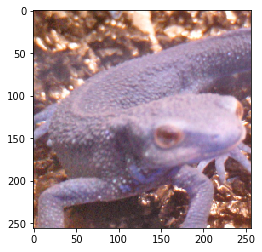

In [2]:
#1
img = cv2.imread('imori.png')
plt.imshow(img)
plt.show()

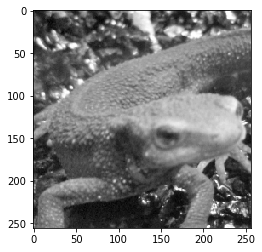

In [3]:
#2
img = cv2.imread('imori.png').astype(np.float)
r = img[..., 2].copy()
g = img[..., 1].copy()
b = img[..., 0].copy()
img = 0.2126 * r + 0.7152 * g + 0.0722 * b
img = img.astype(np.uint8)

plt.imshow(img, cmap='gray')
plt.show()

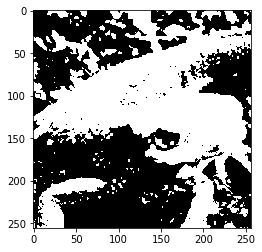

In [4]:
#3
img = cv2.imread('imori.png').astype(np.float)
r = img[..., 2].copy()
g = img[..., 1].copy()
b = img[..., 0].copy()
img = 0.2126 * r + 0.7152 * g + 0.0722 * b
img[img < 128] = 0
img[img >= 128] = 255

plt.imshow(img, cmap='gray')
plt.show()

128
2.6973105717947345


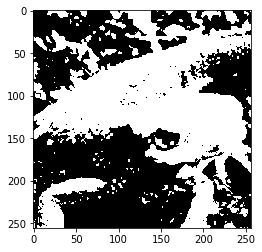

In [23]:
#4
img = cv2.imread('imori.png').astype(np.float)
r = img[..., 2].copy()
g = img[..., 1].copy()
b = img[..., 0].copy()
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b

sigmat = np.var(gray)
max_x = 0
max_t = 0
for i in range(256):
    class0 = gray[gray < i]
    class1 = gray[gray >= i]
    w0 = class0.size
    w1 = class1.size
    m0 = np.mean(class0)
    m1 = np.mean(class1)
    sigmab = w0*w1*(m0-m1)**2/(w0+w1)**2
    x = sigmab/(sigmat-sigmab)
    if x > max_x:
        max_x = x
        max_t = i

print(max_t)
print(max_x)
gray[gray < max_t] = 0
gray[gray >= max_t] = 255

plt.imshow(gray, cmap='gray')
plt.show()

/Users/keigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/keigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater_equal
/Users/keigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less


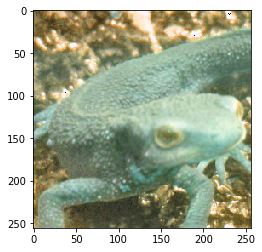

In [62]:
#5
def rgb2hsv(_img):
    img = _img.copy() / 255
    hsv = np.zeros_like(img)
    
    _max = np.max(img, axis=2)
    _min = np.min(img, axis=2)
    min_idx = np.argmin(img, axis=2)
    
    #H
    hsv[..., 0][np.where(_max == _min)] = 0
    a = np.where(min_idx == 2)
    hsv[..., 0][a] = (60 * (img[..., 1][a] - img[..., 0][a])) / (_max[a] - _min[a]) + 60
    a = np.where(min_idx == 0)
    hsv[..., 0][a] = (60 * (img[..., 2][a] - img[..., 1][a])) / (_max[a] - _min[a]) + 180
    a = np.where(min_idx == 1)
    hsv[..., 0][a] = (60 * (img[..., 0][a] - img[..., 2][a])) / (_max[a] - _min[a]) + 300
    
    #S
    hsv[..., 1] = _max - _min
    
    #V
    hsv[..., 2] = _max
    
    return hsv
    
def hsv2rgb(hsv):
    img = np.zeros_like(hsv)
    c = hsv[..., 1]
    _h = hsv[..., 0] / 60
    x = c * (1- np.abs(_h % 2 -1))
    v = hsv[..., 2]
    z = np.zeros_like(c)
    
    vals = [[c, x, z], [x, c, z], [z, c, x], [z, x, c], [x, z, c], [c, z, x]]
    for i in range(6):
        a = np.where((i <= _h) & (_h < i + 1))
        img[..., 0][a] = (v - c)[a] + vals[i][0][a]
        img[..., 1][a] = (v - c)[a] + vals[i][1][a]
        img[..., 2][a] = (v - c)[a] + vals[i][2][a]
        
    img = np.clip(img, 0, 1) * 255
    img = img.astype(np.uint8)
    return img
    

img = cv2.imread('imori.png').astype(np.float32)
img = img[..., ::-1]

hsv = rgb2hsv(img)
hsv[..., 0] = (hsv[..., 0] + 180) % 360
result = hsv2rgb(hsv)

plt.imshow(result)
plt.show()

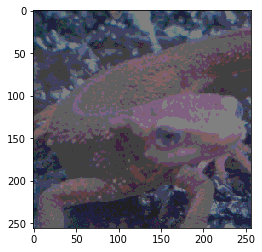

In [75]:
#6
img = cv2.imread('imori.png')
img = img[..., ::-1]

num = [64, 128, 192, 256]
for i in range(4):
    img[np.where((num[i] - 64 <= img) & (img < num[i]))] = num[i] / 2

plt.imshow(img)
plt.show()

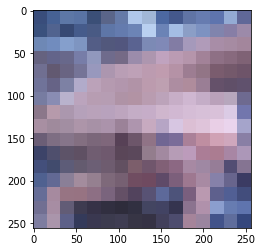

In [143]:
#7
def pooling(_img, size=8):
    img = _img.copy().astype(np.float)
    out = np.zeros_like(img)
    h, w, c = img.shape
    for i in range(int(h/size)):
        for j in range(int(w/size)):
            for k in range(c):
                out[i*size:i*size+size, j*size:j*size+size, k] = np.mean(img[i*size:i*size+size, j*size:j*size+size, k])
    out = out.astype(np.uint8)
    return out
                

img = cv2.imread('imori.png')
img = img[..., ::-1]

result = pooling(img, 16)

plt.imshow(result)
plt.show()

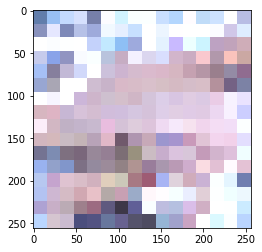

In [102]:
#8
def max_pooling(_img, size=8):
    img = _img.copy().astype(np.float)
    out = np.zeros_like(img)
    h, w, c = img.shape
    for i in range(int(h/size)):
        for j in range(int(w/size)):
            for k in range(c):
                out[i*size:i*size+size, j*size:j*size+size, k] = np.max(img[i*size:i*size+size, j*size:j*size+size, k])
    out = out.astype(np.uint8)
    return out
                

img = cv2.imread('imori.png')
img = img[..., ::-1]

result = max_pooling(img, 16)

plt.imshow(result)
plt.show()

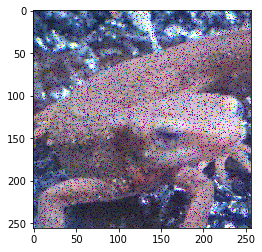

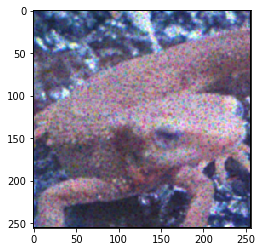

In [4]:
#9
def gaussian_filter(_img, size=3, sigma=1.3):
    img = _img.copy().astype(np.float)
    out = np.zeros_like(img)
    pad = size // 2
    
    ker = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = i - pad
            y = j - pad
            ker[i, j] = 1 / (2 * np.pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    ker = ker / np.sum(ker)
    
    h, w, c = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            for k in range(c):
                out[i, j, k] = np.sum(img[i-pad:i+pad+1, j-pad:j+pad+1, k] * ker)
    return out.astype(np.uint8)
                

img = cv2.imread('imori_noise.png')
img = img[..., ::-1]
plt.imshow(img)
plt.show()

result = gaussian_filter(img)
plt.imshow(result)
plt.show()

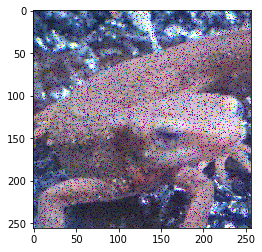

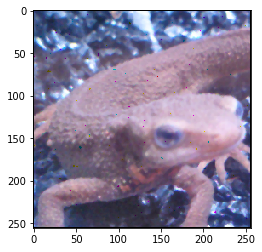

In [3]:
#10
def median_filter(_img, size=3, sigma=1.3):
    img = _img.copy()
    out = np.zeros_like(img)
    pad = size // 2
    
    h, w, c = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            for k in range(c):
                out[i, j, k] = np.median(img[i-pad:i+pad+1, j-pad:j+pad+1, k])
    return out
                

img = cv2.imread('imori_noise.png')
img = img[..., ::-1]
plt.imshow(img)
plt.show()

result = median_filter(img)
plt.imshow(result)
plt.show()

In [93]:
#test
a = [1, 2, 3, 4, 5, 6]
print(a[1:5])

[2, 3, 4, 5]


In [141]:
a = np.zeros((9,9))
for i in range(9):
    for j in range(9):
        a[i, j] = i+j
print(a)
print(a[1:3, 1:3])

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13.]
 [ 6.  7.  8.  9. 10. 11. 12. 13. 14.]
 [ 7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 8.  9. 10. 11. 12. 13. 14. 15. 16.]]
[[2. 3.]
 [3. 4.]]
